# Homework 2


## References

+ 《数值分析》

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.


## Student details

+ 姓名:郭俊烨
+ 学号:07Q20108
+ Email:gjy2383@gmail.com
------
+ 姓名:刘宏毅
+ 学号:07Q20138
+ Email:213201699@seu.edu.cn

## Problem 1： 生成Legendre 多项式，并画图

**要求:** 根据如下的三项递推关系式，利用Python实现Legendre多项式的程序，并画出前6阶多项式的图像

三项递推关系式为：
$$
(n+1)L_{n+1}(x) = (2n+1)x L_n(x)- nL_{n-1}(x), \quad n \geq 1, \, x\in[-1,1]
$$
其中0阶和1阶多项式为
$$
L_0(x) = 1, \quad  L_1(x) = x. 
$$


**Answer:**


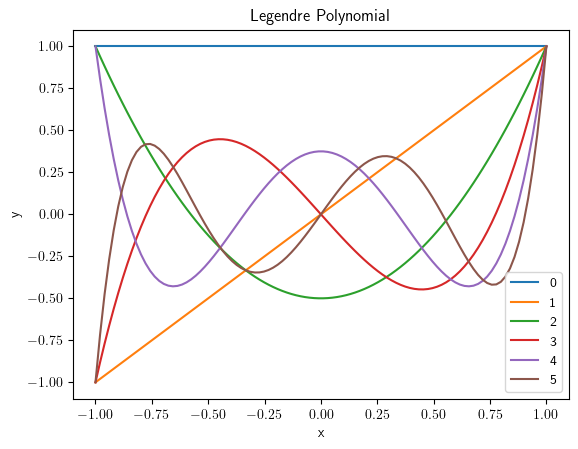

In [10]:
from numpy import *
from numpy import polynomial as P

def CreateLegendreSequence(N):#N为多项式个数
    LegendreSequence=[P.Polynomial(1,domain=[-1,1])]#多项式1，而非浮点数1
    if N==1:
        return LegendreSequence#特殊处理
    Polynomialx=P.Polynomial([0,1],domain=[-1,1])
    LegendreSequence.append(Polynomialx)
    n=1#n为当前最后一个多项式的下标
    while n<N-1:#注意边界
        LegendreSequence.append(((2*n+1)*Polynomialx*LegendreSequence[n]-n*LegendreSequence[n-1])/(n+1))#往后添加第（n+1）个
        n+=1
    return LegendreSequence
'''
while True:#测试用
    N=input("请输入正整数N:")
    N=int(N)
    if N<=0:#检查是否为正整数
        print("请输入正整数")
    else:
        break

LegendreSequence=CreateLegendreSequence(N)
print("前",N,"个勒让德多项式为",LegendreSequence)
'''
N=6
LegendreSequence=CreateLegendreSequence(N)
from matplotlib.pyplot import *
xVals=linspace(-1,1,100)
figure()
xlabel("x")
ylabel("y")
title("Legendre Polynomial")
n=0
while n<N:
    plot(xVals,LegendreSequence[n](xVals),label=n)
    n+=1
legend()
show()

## Problem 2:  数值积分

**要求：** 写出梯形求积公式和中点求积公式的Python实现，并测试收敛阶。


- *梯形求积公式*的一般形式为：

$$
\displaystyle \int_a^b f(x)dx \approx h [\frac{1}{2}f(x_0)+\sum^{n-1}_{i=1} f(x_i) +\frac{1}{2}f(x_n)]
$$

- *梯形求积公式*的一般形式为：
$$
\displaystyle \int_a^b f(x)dx \approx h \sum^{n-1}_{i=0} f(x_i), 
$$
其中 $x_i =(a + \frac{h}{2}) + ih$.



- 1） 利用Python实现梯形求积公式和中点求积公式，分别命名程序名为`trapezoidal` 和 `midpoint`;

- 2） 分别利用上面的程序求如下积分,并比较两种方法算着点书增加值的变化：
   -  (1) $\displaystyle \int_{-1}^1 x^6dx $ 

   -  (2) $\displaystyle \int_{0}^{\pi} \sin xdx $ 
   
   -  (3) $\displaystyle \int_{-1}^{1.1} e^{-x^2}dx $ 

- 3） 选取上面（1）中的例子，测试两种方法关于求积节点的收敛阶，是否和书上所学结果一致？



**Answer:**


- 1） **Answer:**

In [1]:
# !!!!NEED INSTALL LATEX IN YOUR TERMINAL!!!
import numpy as np
import matplotlib.pyplot as plt

# lower_bound: the lower bound of the calculus
# upper_bound: the upper bound of the calculus
# function: the function need to calculate
# N: the number of points in the trapezoidal integal formula


def trapezoidal(lower_bound, upper_bound, function, N):
   
    # caculate the length of step
    step = (upper_bound - lower_bound) / N

    # create the points, according to the step and exclude the lower bound point and upper bound point
    points = np.linspace(lower_bound, upper_bound, N, endpoint=False)[1 :]

    # use the trapezoidal integal formula to caculate
    values = function(points)
    int_value = (function(lower_bound) / 2 + function(upper_bound) / 2 + np.sum(values)) * step

    return int_value


def midpoint(lower_bound, upper_bound, function, N):

    # caculate the length of step
    step = (upper_bound - lower_bound) / N
    
    # create the points, according to the step
    points = np.linspace(lower_bound, upper_bound, N+1)

    # caculate the midpoint of every interval
    midpoints = (points[: N] + points[1 :]) / 2

    # use the midpoint integal formula to caculate
    values = function(midpoints)
    int_value = step * np.sum(values)

    return int_value



- 2）**Answer:**
  
  Use `trapezoidal` and `midpoint` above calculate the integral value of some functions and use `matplotlib` to visualize the relationship between the number of points and the integral value.

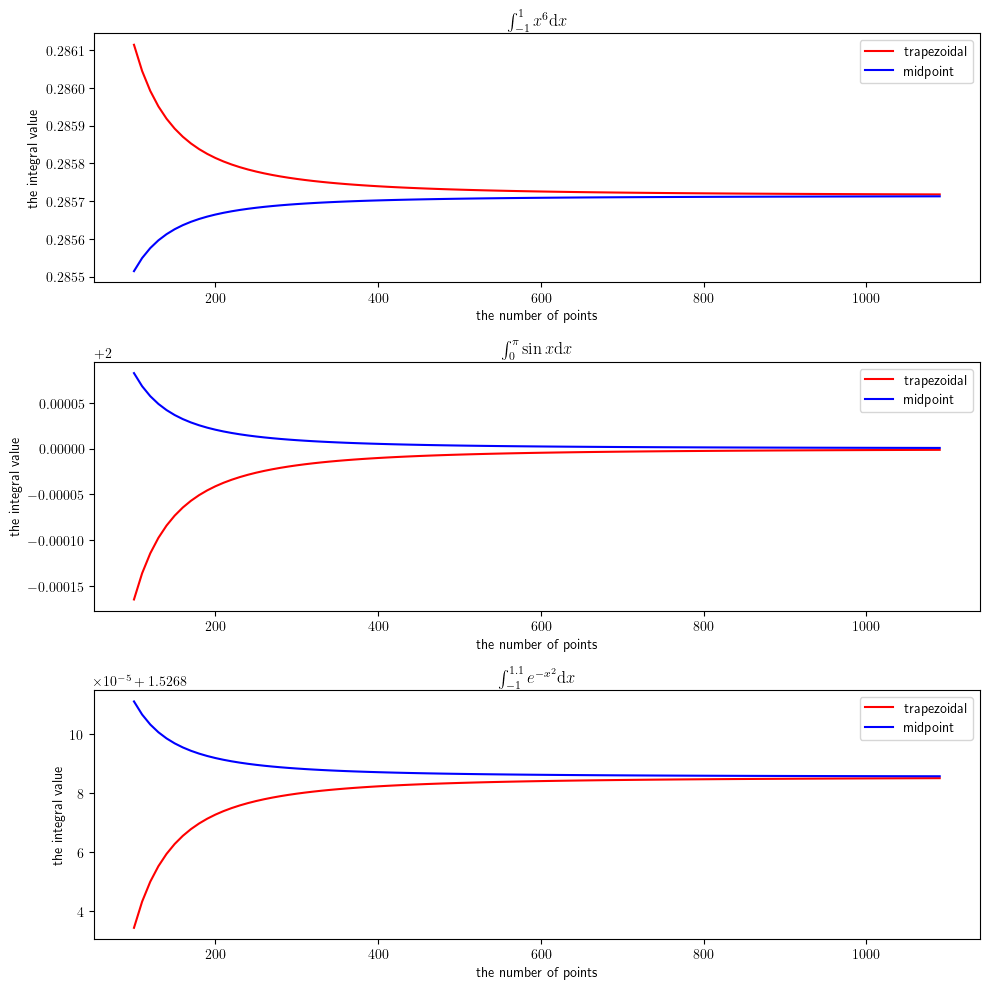

In [3]:

f1 = lambda x : x**6

f2 = lambda x : np.sin(x)

f3 = lambda x : np.exp(-x**2)

    
# create array to store data
points_num = np.arange(100, 1100, 10)
trap_values = np.zeros(len(points_num))
midp_values = np.zeros(len(points_num))

# calculate the integral values with different function
for i in range(len(points_num)):
    trap_values[i] = trapezoidal(-1, 1, f1, points_num[i])
    midp_values[i] = midpoint(-1, 1, f1, points_num[i])

# create a figure and modifiy its size
plt.figure(figsize=(10,10))

# output the figure
plt.subplot(3, 1, 1)
plt.plot(points_num, trap_values, label='trapezoidal', color='red')
plt.plot(points_num, midp_values, label='midpoint', color='blue')
plt.xlabel('the number of points')
plt.ylabel('the integral value')
plt.rcParams['text.usetex'] = True
plt.title(r'$\int_{-1}^{1} x^6 \mathrm{d}x$')
plt.legend()
plt.tight_layout()

# calculate the integral values with different function
for i in range(len(points_num)):
    trap_values[i] = trapezoidal(0, np.pi, f2, points_num[i])
    midp_values[i] = midpoint(0, np.pi, f2, points_num[i])

# output the figure
plt.subplot(3, 1, 2)
plt.plot(points_num, trap_values, label='trapezoidal', color='red')
plt.plot(points_num, midp_values, label='midpoint', color='blue')
plt.xlabel('the number of points')
plt.ylabel('the integral value')
plt.rcParams['text.usetex'] = True
plt.title(r'$\int_{0}^{\pi} \sin x \mathrm{d}x$')
plt.legend()
plt.tight_layout()

# calculate the integral values with different function
for i in range(len(points_num)):
    trap_values[i] = trapezoidal(-1, 1.1, f3, points_num[i])
    midp_values[i] = midpoint(-1, 1.1, f3, points_num[i])

# output the figure
plt.subplot(3, 1, 3)
plt.plot(points_num, trap_values, label='trapezoidal', color='red')
plt.plot(points_num, midp_values, label='midpoint', color='blue')
plt.xlabel('the number of points')
plt.ylabel('the integral value')
plt.rcParams['text.usetex'] = True
plt.title(r'$\int_{-1}^{1.1} e^{-x^2} \mathrm{d}x$')
plt.legend()
plt.tight_layout()

plt.show()


- 3）**Answer:**

    To calculate the rate of convergence, we found that:
    
    When $h\rightarrow 0$, then we have:
    $$I_n - I = Ch^p$$
    $$\ln(I_n - I) = \ln C + p \ln h$$

    If we regard $\ln(I_n - I)$ as $y$, $\ln C$ as $b$ and $p \ln h$ as $ax$, then it turns to a simple linear regression $y = \alpha x + \beta$, and we just need to caiculate its parameter values $\alpha$. For the calculus in (1), we have:

    $$I = \int_{-1}^{1} x^6 \mathrm{d}x = \frac{2}{7}.$$

    In simple linear regression, the parameter $\alpha$ can be described as:

    $$ \alpha = \frac{\sum_{i = 1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^{n} (x_i - \bar{x})^2}$$
    $$ = \frac{\sum_{i = 1}^{n} (\ln h_i - \overline{\ln h})(\ln(I_i - I) - \overline{\ln(I_i - I)})}{\sum_{i = 1}^{n} (\ln h_i - \overline{\ln h})^2}.$$

    By the way, in order to avoid illegal value in $ \ln() $, we take place of $I_i - I $ with $| I_i - I |$.

In [9]:
# calculate the integral values in (1)
for i in range(len(points_num)):
    trap_values[i] = trapezoidal(-1, 1, f1, points_num[i])
    midp_values[i] = midpoint(-1, 1, f1, points_num[i])

# get the length of step in different number of points
h = 2 / points_num 
h = np.log(h)
aver_h = np.average(h)

# calculate ln(I_n - I) and its average
trap_values = trap_values - 2/7
trap_values = np.log(np.abs(trap_values))

midp_values = midp_values - 2/7
midp_values = np.log(np.abs(midp_values))

aver_trap = np.average(trap_values)
aver_midp = np.average(midp_values)

# calculate the parameter \alpha (p)
trap_p = np.sum((h - aver_h)*(trap_values - aver_trap)) / np.sum((h - aver_h)**2)
midp_p = np.sum((h - aver_h)*(midp_values - aver_midp)) / np.sum((h - aver_h)**2)

# output
print("The rate of convergence using trapezoidal: ", trap_p)
print("The rate of convergence using midpoint: ", midp_p)


The rate of convergence using trapezoidal:  1.9999692598614944
The rate of convergence using midpoint:  1.9999462033733726


-End-